In [1]:
!pip install sentence-transformers --quiet
!pip install scikit-learn --quiet

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
documents = [
    "Artificial Intelligence is transforming the world.",
    "Machine Learning and AI are closely related fields.",
    "Python is a popular programming language for data science.",
    "Natural Language Processing is a subfield of AI.",
    "The stock market has seen significant volatility this year.",
    "Investment strategies often rely on technical analysis.",
    "The new iPhone model is generating a lot of buzz.",
    "Tech companies are leading the innovation race.",
    "Data analysis is a critical skill in many industries.",
    "The global economy is experiencing rapid changes."
]

print(f"Number of documents: {len(documents)}")

Number of documents: 10


In [4]:
# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the documents
embeddings = model.encode(documents)

# Display the shape of the embeddings
print(f"Embeddings Shape: {embeddings.shape}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings Shape: (10, 384)


In [5]:
# Define the number of clusters
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

# Assign cluster labels to documents
clustered_data = pd.DataFrame({
    "Document": documents,
    "Cluster": cluster_labels
})

# Display the clustered data
print("Clustered Documents:")
print(clustered_data)

Clustered Documents:
                                            Document  Cluster
0  Artificial Intelligence is transforming the wo...        2
1  Machine Learning and AI are closely related fi...        0
2  Python is a popular programming language for d...        2
3   Natural Language Processing is a subfield of AI.        0
4  The stock market has seen significant volatili...        1
5  Investment strategies often rely on technical ...        1
6  The new iPhone model is generating a lot of buzz.        1
7    Tech companies are leading the innovation race.        1
8  Data analysis is a critical skill in many indu...        1
9  The global economy is experiencing rapid changes.        2


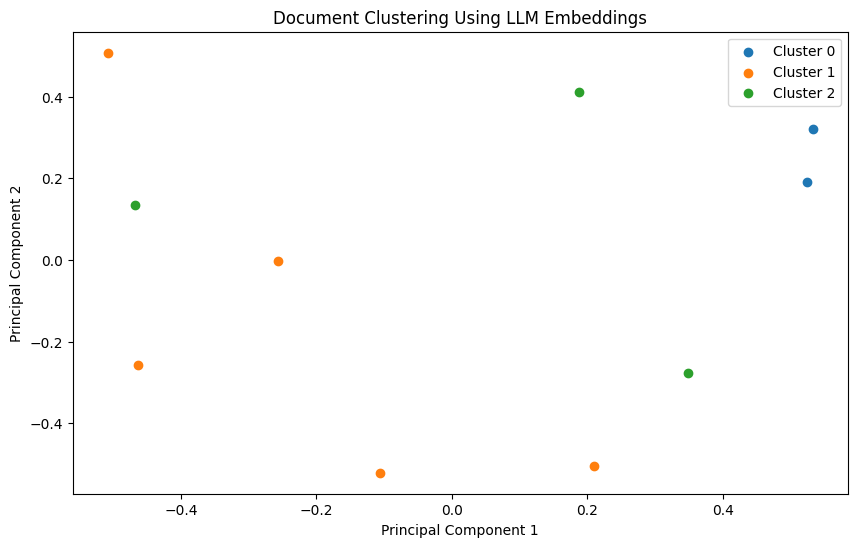

In [6]:
# Reduce dimensionality of embeddings for visualization
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = embeddings_pca[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Document Clustering Using LLM Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [7]:
# Group documents by clusters and analyze
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    print(clustered_data[clustered_data['Cluster'] == cluster]['Document'].values)


Cluster 0:
['Machine Learning and AI are closely related fields.'
 'Natural Language Processing is a subfield of AI.']

Cluster 1:
['The stock market has seen significant volatility this year.'
 'Investment strategies often rely on technical analysis.'
 'The new iPhone model is generating a lot of buzz.'
 'Tech companies are leading the innovation race.'
 'Data analysis is a critical skill in many industries.']

Cluster 2:
['Artificial Intelligence is transforming the world.'
 'Python is a popular programming language for data science.'
 'The global economy is experiencing rapid changes.']
